<a href="https://colab.research.google.com/github/madelinemccombe/LaunchDS/blob/master/TextAnalysis_GoT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data from Kaggle: https://www.kaggle.com/khulasasndh/game-of-thrones-books#005ssb.txt
from google.colab import files
upload = files.upload()

Saving 001ssb.txt to 001ssb.txt


In [0]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import random
from nltk.stem.wordnet import WordNetLemmatizer

In [3]:
# getting all words from the book tokenized and lemmatized
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

got1 = open("001ssb.txt").read().strip().split('\n')

got = open("001ssb.txt").read()
got_words = word_tokenize(got)
stop_words=stopwords.words("english")
punct = list(string.punctuation)
stops = stop_words + punct + ["''", 'r.', '``', "'s", "n't"]

filtered_words=[]
for w in got_words:
    if w.lower() not in stops:
        filtered_words.append(w.lower())

lem = WordNetLemmatizer()
lemm_words=[]
for w in filtered_words:
    lemm_words.append(lem.lemmatize(w))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
# word exploration
print('There are', len(lemm_words), 'words total')  # 152047
print('There are', len(np.unique(lemm_words)), 'unique words')  # 152047

lemm_col = pd.Series(lemm_words)

word_counts = lemm_col.value_counts()
solo = word_counts[word_counts<2].index.values.tolist() # all words that occur more than once

remove = stops+solo

There are 152047 words total
There are 10985 unique words


In [5]:
# creating a list of cleaned strings for the words on each page
pages = pd.Series(re.split(r'Page [0-9]+', got))
print('There are', len(pages), 'pages')

from nltk.tokenize import RegexpTokenizer 
page_lemm = []
for i in range(len(pages)):
  text = pages[i]
  tokens = RegexpTokenizer(r'[a-zA-Z\']+').tokenize(text)
  final = []
  for w in tokens:
    if w.lower() not in remove:
        final.append(w.lower())
  lemm_word=[]
  for w in final:
    lemm_word.append(lem.lemmatize(w))
  page_lemm.append(' '.join(lemm_word))

There are 572 pages


In [6]:
page_lemm[0]

"game throne book one song ice fire george r r martin start back gared urged wood began grow dark around wildlings dead dead frighten ser waymar royce asked hint smile gared rise old man past fifty seen lordlings come go dead dead said business dead dead royce asked softly proof saw gared said say dead that's proof enough known would drag quarrel sooner later wished later rather sooner mother told dead men sing song put wet nurse said thing royce replied never believe anything hear woman's thing learned even dead voice echoed loud twilit forest"

In [7]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
BOW = bow.fit_transform(page_lemm)
bagOFwords = pd.DataFrame(BOW.toarray())
bagOFwords.columns = bow.get_feature_names()
bagOFwords.head()

aback  abandon  abandoned  abashed  ...  youth  yowl  yowling  yvar
0      0        0          0        0  ...      0     0        0     0
1      0        0          0        0  ...      1     0        0     0
2      0        0          0        0  ...      0     0        0     0
3      0        0          0        0  ...      0     0        0     0
4      0        0          0        0  ...      0     0        0     0

[5 rows x 6879 columns]

In [8]:
# BOW counts and exploration
count_word = bagOFwords.mean(axis=0)
small = count_word[count_word==0].index.values.tolist()
final_bag = bagOFwords.drop(small, axis=1)
print('Dimensions of Array:', final_bag.shape)
print('Top 10 Average Count Bag of Words\n', final_bag.mean(axis=0).sort_values(ascending=False)[0:10])
top_10 = final_bag.mean(axis=0).sort_values(ascending=False)[0:10].index.values.tolist()
final_bag.head()

Dimensions of Array: (572, 6879)
Top 10 Average Count Bag of Words
 said     3.403846
lord     2.590909
would    1.952797
ser      1.701049
one      1.459790
jon      1.452797
could    1.419580
hand     1.395105
ned      1.372378
man      1.363636
dtype: float64


aback  abandon  abandoned  abashed  ...  youth  yowl  yowling  yvar
0      0        0          0        0  ...      0     0        0     0
1      0        0          0        0  ...      1     0        0     0
2      0        0          0        0  ...      0     0        0     0
3      0        0          0        0  ...      0     0        0     0
4      0        0          0        0  ...      0     0        0     0

[5 rows x 6879 columns]

In [9]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
got_tfidf = vectorizer.fit_transform(page_lemm)
tfidf = pd.DataFrame(got_tfidf.toarray())
tfidf.columns = vectorizer.get_feature_names()
tfidf.head()

aback  abandon  abandoned  abashed  ...     youth  yowl  yowling  yvar
0    0.0      0.0        0.0      0.0  ...  0.000000   0.0      0.0   0.0
1    0.0      0.0        0.0      0.0  ...  0.048307   0.0      0.0   0.0
2    0.0      0.0        0.0      0.0  ...  0.000000   0.0      0.0   0.0
3    0.0      0.0        0.0      0.0  ...  0.000000   0.0      0.0   0.0
4    0.0      0.0        0.0      0.0  ...  0.000000   0.0      0.0   0.0

[5 rows x 6879 columns]

In [10]:
# TF-IDF counts and exploration
avg_tfidf = tfidf.mean(axis=0)
print('TF-IDF Scores for Bag of words top 10\n', avg_tfidf[top_10])
print('Top 10 Highest Average TF-IDF Scores\n', avg_tfidf.sort_values(ascending=False)[0:10])

TF-IDF Scores for Bag of words top 10
 said     0.054890
lord     0.050639
would    0.035535
ser      0.038055
one      0.027533
jon      0.044859
could    0.027167
hand     0.027146
ned      0.044902
man      0.027804
dtype: float64
Top 10 Highest Average TF-IDF Scores
 said      0.054890
lord      0.050639
ned       0.044902
jon       0.044859
ser       0.038055
tyrion    0.037336
would     0.035535
bran      0.034314
king      0.033834
arya      0.030339
dtype: float64


In [40]:
# POS tagging
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('averaged_perceptron_tagger')

document = ' '.join(got1[8:10])
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

sent = preprocess(document)
print(got1[8:10])
print(sent)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['"Dead is dead," he said. "We have no business with the dead." ', '"Are they dead?" Royce asked softly. "What proof have we?" ']
[('``', '``'), ('Dead', 'JJ'), ('is', 'VBZ'), ('dead', 'JJ'), (',', ','), ("''", "''"), ('he', 'PRP'), ('said', 'VBD'), ('.', '.'), ('``', '``'), ('We', 'PRP'), ('have', 'VBP'), ('no', 'DT'), ('business', 'NN'), ('with', 'IN'), ('the', 'DT'), ('dead', 'JJ'), ('.', '.'), ("''", "''"), ('``', '``'), ('Are', 'NNP'), ('they', 'PRP'), ('dead', 'VBD'), ('?', '.'), ("''", "''"), ('Royce', 'NNP'), ('asked', 'VBD'), ('softly', 'RB'), ('.', '.'), ('``', '``'), ('What', 'WP'), ('proof', 'NN'), ('have', 'VBP'), ('we', 'PRP'), ('?', '.'), ("''", "''")]


In [17]:
# string of the first 5000 lines of GOT (whole book was too much at once)
document3 = ' '.join(got1[0:5000])
document3

'A Game Of Thrones  Book One of A Song of Ice and Fire  By George R. R. Martin  PROLOGUE  "We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are  dead."  "Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile.  Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go.  "Dead is dead," he said. "We have no business with the dead."  "Are they dead?" Royce asked softly. "What proof have we?"  "Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me."  Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather  than sooner. "My mother told me that dead men sing no songs," he put in.  "My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s  tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest.  Page 1  "W

In [20]:
# spacy NER
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from pprint import pprint

doc = nlp(document3)
pprint([(X.text, X.label_) for X in doc.ents])

[('George R. R. Martin  ', 'PERSON'),
 ('Ser Waymar Royce', 'PERSON'),
 ('fifty', 'CARDINAL'),
 ('Will', 'PERSON'),
 ('Royce', 'PERSON'),
 ('Eight days', 'DATE'),
 ('nine', 'CARDINAL'),
 ('Waymar Royce', 'PERSON'),
 ('Gared', 'PERSON'),
 ('Gared', 'ORG'),
 ('forty years', 'DATE'),
 ('four years', 'DATE'),
 ('first', 'ORDINAL'),
 ('hundred', 'CARDINAL'),
 ('tonight', 'TIME'),
 ('tonight', 'TIME'),
 ('Nine days', 'DATE'),
 ('Each day', 'DATE'),
 ('the day', 'DATE'),
 ('Today', 'DATE'),
 ('All day', 'DATE'),
 ('Will', 'PERSON'),
 ('Waymar Royce', 'PERSON'),
 ('eighteen', 'CARDINAL'),
 ('Will and Gared', 'WORK_OF_ART'),
 ('Ser Waymar', 'PERSON'),
 ('Bet', 'PERSON'),
 ('Mormont', 'PERSON'),
 ('half', 'CARDINAL'),
 ('2  ', 'QUANTITY'),
 ('Will', 'PERSON'),
 ("the Night's Watch", 'WORK_OF_ART'),
 ('Mallisters', 'PERSON'),
 ('Mallisters', 'PERSON'),
 ('Will', 'PERSON'),
 ('two miles', 'QUANTITY'),
 ('eight', 'CARDINAL'),
 ('One', 'CARDINAL'),
 ('one', 'CARDINAL'),
 ('Royce', 'PERSON'),
 ('Royc

In [21]:
# IOB tags with NER classification (missing POS tags)
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(A, 'O', ''),
 (Game, 'O', ''),
 (Of, 'O', ''),
 (Thrones, 'O', ''),
 ( , 'O', ''),
 (Book, 'O', ''),
 (One, 'O', ''),
 (of, 'O', ''),
 (A, 'O', ''),
 (Song, 'O', ''),
 (of, 'O', ''),
 (Ice, 'O', ''),
 (and, 'O', ''),
 (Fire, 'O', ''),
 ( , 'O', ''),
 (By, 'O', ''),
 (George, 'B', 'PERSON'),
 (R., 'I', 'PERSON'),
 (R., 'I', 'PERSON'),
 (Martin, 'I', 'PERSON'),
 ( , 'I', 'PERSON'),
 (PROLOGUE, 'O', ''),
 ( , 'O', ''),
 (", 'O', ''),
 (We, 'O', ''),
 (should, 'O', ''),
 (start, 'O', ''),
 (back, 'O', ''),
 (,, 'O', ''),
 (", 'O', ''),
 (Gared, 'O', ''),
 (urged, 'O', ''),
 (as, 'O', ''),
 (the, 'O', ''),
 (woods, 'O', ''),
 (began, 'O', ''),
 (to, 'O', ''),
 (grow, 'O', ''),
 (dark, 'O', ''),
 (around, 'O', ''),
 (them, 'O', ''),
 (., 'O', ''),
 (", 'O', ''),
 (The, 'O', ''),
 (wildlings, 'O', ''),
 (are, 'O', ''),
 ( , 'O', ''),
 (dead, 'O', ''),
 (., 'O', ''),
 (", 'O', ''),
 ( , 'O', ''),
 (", 'O', ''),
 (Do, 'O', ''),
 (the, 'O', ''),
 (dead, 'O', ''),
 (frighten, 'O', ''),
 (you, '

In [22]:
# counting the number of matches per label
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'CARDINAL': 340,
         'DATE': 169,
         'FAC': 34,
         'GPE': 195,
         'LAW': 2,
         'LOC': 24,
         'MONEY': 1,
         'NORP': 32,
         'ORDINAL': 88,
         'ORG': 386,
         'PERSON': 2307,
         'PRODUCT': 35,
         'QUANTITY': 23,
         'TIME': 86,
         'WORK_OF_ART': 77})

In [38]:
# showing the top 5 matches found
items = [x.text for x in doc.ents]
Counter(items).most_common(5)

[('Jon', 259), ('Ned', 247), ('Arya', 145), ('Robert', 132), ('Catelyn', 128)]

In [41]:
# POS tagging for first 5000 lines
big_sent = ' '.join(got1[0:5000])
big_sent = preprocess(big_sent) # created earlier-POS tagged words
big_sent[0:20]

[('A', 'DT'),
 ('Game', 'NNP'),
 ('Of', 'IN'),
 ('Thrones', 'NNP'),
 ('Book', 'NNP'),
 ('One', 'NNP'),
 ('of', 'IN'),
 ('A', 'NNP'),
 ('Song', 'NNP'),
 ('of', 'IN'),
 ('Ice', 'NNP'),
 ('and', 'CC'),
 ('Fire', 'NNP'),
 ('By', 'IN'),
 ('George', 'NNP'),
 ('R.', 'NNP'),
 ('R.', 'NNP'),
 ('Martin', 'NNP'),
 ('PROLOGUE', 'NNP'),
 ('``', '``')]

In [37]:
# IOB tagging the POS tag - I wasn't able to get this to work correctly
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(big_sent)
pprint(iob_tagged)

[('A', 'DT', 'O'),
 ('Game', 'NNP', 'O'),
 ('Of', 'IN', 'O'),
 ('Thrones', 'NNP', 'O'),
 ('Book', 'NNP', 'O'),
 ('One', 'NNP', 'O'),
 ('of', 'IN', 'O'),
 ('A', 'NNP', 'O'),
 ('Song', 'NNP', 'O'),
 ('of', 'IN', 'O'),
 ('Ice', 'NNP', 'O'),
 ('and', 'CC', 'O'),
 ('Fire', 'NNP', 'O'),
 ('By', 'IN', 'O'),
 ('George', 'NNP', 'O'),
 ('R.', 'NNP', 'O'),
 ('R.', 'NNP', 'O'),
 ('Martin', 'NNP', 'O'),
 ('PROLOGUE', 'NNP', 'O'),
 ('``', '``', 'O'),
 ('We', 'PRP', 'O'),
 ('should', 'MD', 'O'),
 ('start', 'VB', 'O'),
 ('back', 'RP', 'O'),
 (',', ',', 'O'),
 ("''", "''", 'O'),
 ('Gared', 'VBD', 'O'),
 ('urged', 'VBD', 'O'),
 ('as', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('woods', 'NNS', 'O'),
 ('began', 'VBD', 'O'),
 ('to', 'TO', 'O'),
 ('grow', 'VB', 'O'),
 ('dark', 'NN', 'O'),
 ('around', 'IN', 'O'),
 ('them', 'PRP', 'O'),
 ('.', '.', 'O'),
 ('``', '``', 'O'),
 ('The', 'DT', 'O'),
 ('wildlings', 'NNS', 'O'),
 ('are', 'VBP', 'O'),
 ('dead', 'JJ', 'O'),
 ('.', '.', 'O'),
 ("''", "''", 'O'),
 ('``', '``', 

In [61]:
# chunking noun phrases
document2 = ' '.join(got1[100:300])
big_sent = preprocess(document2) # created earlier-POS tagged words

pattern = 'NP: {<DT>?<JJ>*<NN.?>+}'
pattern2 = 'Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}'
pattern3 = 'Chunk: {<NN.?>+<RB.?>*<VB.?>*<RB.?>*<JJ.?>*<CC>?}'
# NP: {<DT>? <JJ>* <NN>*} # NP
# P: {<IN>}           # Preposition
# V: {<V.*>}          # Verb
# PP: {<P> <NP>}      # PP -> P NP
# VP: {<V> <NP|PP>*}  # VP -> V (NP|PP)*
cp = nltk.RegexpParser(pattern)
cs = cp.parse(big_sent)
print(cs)


(S
  ``/``
  If/IN
  Gared/VBN
  said/VBD
  it/PRP
  was/VBD
  the/DT
  cold/JJ
  ./.
  ./.
  ./.
  ''/''
  (NP Will/NNP)
  began/VBD
  ./.
  ``/``
  Have/VBP
  you/PRP
  drawn/VBN
  (NP any/DT watches/NNS)
  (NP this/DT past/JJ week/NN)
  ,/,
  (NP Will/NNP)
  ?/.
  ''/''
  ``/``
  Yes/UH
  ,/,
  (NP m'lord/NN)
  ./.
  ''/''
  There/EX
  never/RB
  was/VBD
  (NP a/DT week/NN)
  when/WRB
  he/PRP
  did/VBD
  not/RB
  draw/VB
  (NP a/DT dozen/NN bloody/NN watches/NNS)
  ./.
  What/WP
  was/VBD
  (NP the/DT man/NN)
  driving/VBG
  at/IN
  ?/.
  ``/``
  And/CC
  how/WRB
  did/VBD
  you/PRP
  find/VB
  (NP the/DT Wall/NNP)
  ?/.
  ''/''
  ``/``
  (NP Weeping/NNP)
  ,/,
  ''/''
  (NP Will/NNP)
  said/VBD
  ,/,
  frowning/VBG
  ./.
  He/PRP
  saw/VBD
  it/PRP
  clear/JJ
  enough/RB
  ,/,
  now/RB
  that/IN
  (NP the/DT lordling/NN)
  had/VBD
  pointed/VBN
  it/PRP
  out/RP
  ./.
  ``/``
  They/PRP
  could/MD
  n't/RB
  have/VB
  froze/VBN
  ./.
  Not/RB
  if/IN
  (NP the/DT Wall/NNP)
  was/V

In [94]:
all_sent = pd.DataFrame()
for i in range(1,571):
  temp = pd.DataFrame()
  page = pages[i]
  temp['sentence'] = tokenize.sent_tokenize(page)
  temp['page'] = i
  all_sent = all_sent.append(temp)
  
all_sent.head()

sentence  page
0  \n\n"We have a long ride before us," Gared poi...     1
1                           "Eight days, maybe nine.     1
2                             And night is falling."     1
3  Ser Waymar Royce glanced at the sky with disin...     1
4           "It does that every day about this time.     1

In [80]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(got[90:985])
sentences

['We should start back," Gared urged as the woods began to grow dark around them.',
 '"The wildlings are \ndead."',
 '"Do the dead frighten you?"',
 'Ser Waymar Royce asked with just the hint of a smile.',
 'Gared did not rise to the bait.',
 'He was an old man, past fifty, and he had seen the lordlings come and go.',
 '"Dead is dead," he said.',
 '"We have no business with the dead."',
 '"Are they dead?"',
 'Royce asked softly.',
 '"What proof have we?"',
 '"Will saw them," Gared said.',
 '"If he says they are dead, that\'s proof enough for me."',
 'Will had known they would drag him into the quarrel sooner or later.',
 'He wished it had been later rather \nthan sooner.',
 '"My mother told me that dead men sing no songs," he put in.',
 '"My wet nurse said the same thing, Will," Royce replied.',
 '"Never believe anything you hear at a woman\'s \ntit.',
 'There are things to be learned even from the dead."',
 'His voice echoed, too loud in the twilit forest.']

In [81]:
# nltk sentiment analysis
#from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
for sentence in sentences:
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
We should start back," Gared urged as the woods began to grow dark around them.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"The wildlings are 
dead."
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"Do the dead frighten you?"
compound: -0.7717, neg: 0.691, neu: 0.309, pos: 0.0, 
Ser Waymar Royce asked with just the hint of a smile.
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, 
Gared did not rise to the bait.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He was an old man, past fifty, and he had seen the lordlings come and go.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
"Dead is dead," he said.
compound: -0.6486, neg: 0.518, neu: 0.482, pos: 0.0, 
"We have no business with the dead."
compound: -0.296, neg: 0.268, neu: 0.732, pos: 0.0, 
"Are they dead?"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Royce asked softly.
compound: 0.0, neg: 0.0, neu: 1.0, 

In [102]:
# applying to all sentences
def sid_compound(text):
  sid = SentimentIntensityAnalyzer()
  ss = sid.polarity_scores(text)
  return(ss['compound'])

all_sent['sid_score'] = all_sent['sentence'].apply(sid_compound)
all_sent.head()

sentence  page  sid_score
0  \n\n"We have a long ride before us," Gared poi...     1        0.0
1                           "Eight days, maybe nine.     1        0.0
2                             And night is falling."     1        0.0
3  Ser Waymar Royce glanced at the sky with disin...     1        0.0
4           "It does that every day about this time.     1        0.0

In [85]:
# textblob sentiment analysis
from textblob import TextBlob
def detect_polarity(text):
    return TextBlob(text).sentiment
for sentence in sentences:
  print(sentence)
  print(detect_polarity(sentence))

  
  
  #sample_reviews['polarity'] = sample_reviews.text.apply(detect_polarity)

We should start back," Gared urged as the woods began to grow dark around them.
Sentiment(polarity=-0.075, subjectivity=0.2)
"The wildlings are 
dead."
Sentiment(polarity=-0.2, subjectivity=0.4)
"Do the dead frighten you?"
Sentiment(polarity=-0.2, subjectivity=0.4)
Ser Waymar Royce asked with just the hint of a smile.
Sentiment(polarity=0.3, subjectivity=0.1)
Gared did not rise to the bait.
Sentiment(polarity=0.0, subjectivity=0.0)
He was an old man, past fifty, and he had seen the lordlings come and go.
Sentiment(polarity=-0.075, subjectivity=0.225)
"Dead is dead," he said.
Sentiment(polarity=-0.2, subjectivity=0.4)
"We have no business with the dead."
Sentiment(polarity=-0.2, subjectivity=0.4)
"Are they dead?"
Sentiment(polarity=-0.2, subjectivity=0.4)
Royce asked softly.
Sentiment(polarity=0.1, subjectivity=0.35)
"What proof have we?"
Sentiment(polarity=0.0, subjectivity=0.0)
"Will saw them," Gared said.
Sentiment(polarity=0.0, subjectivity=0.0)
"If he says they are dead, that's pro

In [103]:
# applying to all sentences
def detect_polarity2(text):
    return TextBlob(text).sentiment.polarity
all_sent['tb_score'] = all_sent['sentence'].apply(detect_polarity2)

all_sent.head()

sentence  page  sid_score  tb_score
0  \n\n"We have a long ride before us," Gared poi...     1        0.0     -0.05
1                           "Eight days, maybe nine.     1        0.0      0.00
2                             And night is falling."     1        0.0      0.00
3  Ser Waymar Royce glanced at the sky with disin...     1        0.0      0.00
4           "It does that every day about this time.     1        0.0      0.00

In [104]:
all_sent

sentence  ...  tb_score
0   \n\n"We have a long ride before us," Gared poi...  ... -0.050000
1                            "Eight days, maybe nine.  ...  0.000000
2                              And night is falling."  ...  0.000000
3   Ser Waymar Royce glanced at the sky with disin...  ...  0.000000
4            "It does that every day about this time.  ...  0.000000
5             Are you \nunmanned by the dark, Gared?"  ... -0.150000
6   Will could see the tightness around Gared's mo...  ... -0.279167
7   Gared had spent forty years in the \nNight's W...  ...  0.150000
8                        Yet it was more than \nthat.  ...  0.500000
9   Under the wounded pride, Will could sense some...  ...  0.166667
10  You could taste it; a \nnervous tension that c...  ...  0.000000
11                            Will shared his unease.  ...  0.000000
12                He had been four years on the Wall.  ...  0.000000
13  The first time he had been sent beyond, all \n...  ...  0.116667
14               He had laughed about it \nafterward.  ...  0.700000
15  He was a veteran of a hundred rangings by now,...  ... -0.131250
16                                     Until tonight.  ...  0.000000
17                   Something was different tonight.  ...  0.000000
18  There was an edge to this darkness that made h...  ...  0.000000
19  Nine days they had been riding, north and nort...  ... -0.291667
20  Each day had been worse than the day that had ...  ... -0.400000
21                        Today was the worst of all.  ... -1.000000
22  A cold wind was blowing out of the north, and ...  ... -0.600000
23  All day, Will had felt as though something wer...  ...  0.050000
24                             Gared had felt it too.  ...  0.000000
25  Will wanted nothing so much as to ride \nhellb...  ...  0.200000
26          Especially not a commander like this one.  ...  0.000000
27  Ser Waymar Royce was the youngest son of an an...  ...  0.500000
28  He was a handsome \nyouth of eighteen, grey-ey...  ...  0.500000
29  Mounted on his huge black destrier, the \nknig...  ...  0.058333
..                                                ...  ...       ...
4   And something else came crashing down, bouncin...  ... -0.255185
5   The roaring filled the world, yet dimly \nthro...  ...  0.250000
6                        Only death can pay for life.  ...  0.000000
7   And there came a second crack, loud and sharp ...  ... -0.106250
8   She heard the screams \nof frightened horses, ...  ...  0.000000
9   No, she wanted to shout to him, no, my good kn...  ...  0.700000
10                                  The fire is mine.  ...  0.000000
11  I am Daenerys Stormborn, daughter of dragons, ...  ...  0.000000
12                                     Don't you SEE?  ...  0.000000
13  With a belch of flame and smoke that \nreached...  ... -0.155556
14  Unafraid, Dany stepped \nforward into the fire...  ...  0.000000
15  The third crack was as loud and sharp as the b...  ... -0.008333
16  When the fire died at last and the ground beca...  ...  0.116667
17  She was naked, covered with soot, her clothes ...  ...  0.425000
18                                                  .  ...  0.000000
19                                                  .  ...  0.000000
20                                yet she was unhurt.  ...  0.000000
21  The cream-and-gold dragon was suckling at her ...  ...  0.142857
22                     Her arms \ncradled them close.  ...  0.000000
23  The black-and-scarlet beast was draped across ...  ... -0.050000
24  When it saw Jorah, it raised its head and look...  ...  0.000000
0         \n\nWordless, the knight fell to his knees.  ...  0.000000
1             The men of her khas came up behind him.  ... -0.400000
2   Jhogo was the first to \nlay his arakh at her ...  ...  0.250000
3   "Blood of my blood," he murmured, pushing his ...  ...  0.000000
4           "Blood of my blood," she heard Aggo echo.  ...  0.000000
5               "Blood of my blood," Rakhar

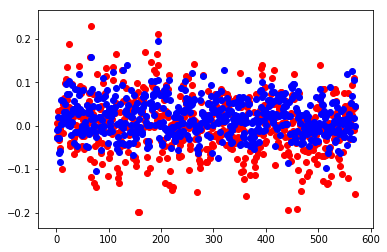

In [141]:
# graphing results
import seaborn as sns
import matplotlib.pyplot as plt

page_scores = all_sent.groupby('page').mean()[['sid_score', 'tb_score']].reset_index()
first10 = page_scores.iloc[0:100]
last10 = page_scores.iloc[-100:]

#sns.relplot(kind='scatter', data=page_scores, x='page', y='tb_score')

plt.scatter(x=page_scores['page'], y=page_scores['sid_score'], c='r')
plt.scatter(x=page_scores['page'], y=page_scores['tb_score'], c='b')

# plt.scatter(x=first10['page'], y=first10['sid_score'], c='r')
# plt.scatter(x=first10['page'], y=first10['tb_score'], c='b')

# plt.scatter(x=last10['page'], y=last10['sid_score'], c='r')
# plt.scatter(x=last10['page'], y=last10['tb_score'], c='b')

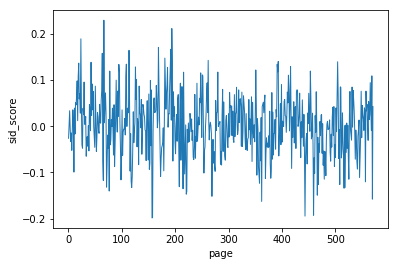

In [150]:
ax = sns.lineplot(x=page_scores['page'], y=page_scores['sid_score'], sort=False, lw=1)

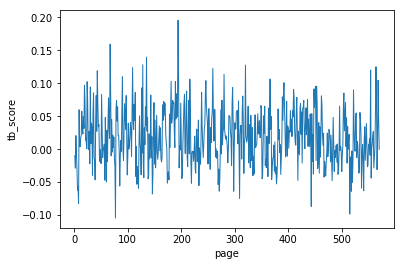

In [151]:
ax = sns.lineplot(x=page_scores['page'], y=page_scores['tb_score'], sort=False, lw=1)

Text(0.5, 1.0, 'Distibution of sentiment by Method (sentence)')

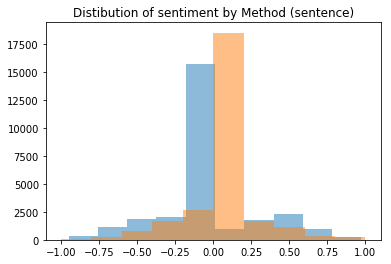

In [139]:
plt.hist(x=all_sent['sid_score'], alpha=0.5)
plt.hist(x=all_sent['tb_score'], alpha=0.5)
plt.title('Distibution of sentiment by Method (sentence)')

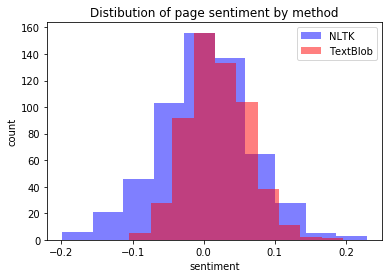

In [165]:
plt.hist(x=page_scores['sid_score'], alpha=0.5, color='b', label='NLTK')
plt.hist(x=page_scores['tb_score'], alpha=0.5, color='r', label='TextBlob')
plt.legend()
plt.title('Distibution of page sentiment by method')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.savefig('graph')